Predecir la puntuacion final total del estudiande (Total_score)


In [ ]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

Importar el dataset para poder usar los datos de la tabla


In [2]:
from sys import path
path.append(os.path.realpath('..'))
from Dataset import *

Cargamos el dataset en una variable


In [3]:
import pandas as pd

data = pd.read_csv('../Dataset/Students_Grading_Dataset.csv')
print(data)

#data = np.loadtxt('../Dataset/Students_Grading_Dataset.csv', delimiter=',')
#X, y = data[:, 0], data[:, 1]
#m= y.size

     Student_ID First_Name Last_Name                       Email  Gender  Age  \
0         S1000       Omar  Williams     student0@university.com  Female   22   
1         S1001      Maria     Brown     student1@university.com    Male   18   
2         S1002      Ahmed     Jones     student2@university.com    Male   24   
3         S1003       Omar  Williams     student3@university.com  Female   24   
4         S1004       John     Smith     student4@university.com  Female   23   
...         ...        ...       ...                         ...     ...  ...   
4995      S5995      Ahmed     Jones  student4995@university.com    Male   19   
4996      S5996       Emma     Brown  student4996@university.com    Male   19   
4997      S5997       John     Brown  student4997@university.com  Female   24   
4998      S5998       Sara     Davis  student4998@university.com    Male   23   
4999      S5999      Maria     Brown  student4999@university.com  Female   21   

       Department  Attendan

Ahora cargamos el dataset a una nueva variable pero eliminando datos que no usaremos commo nombre, apellido, id, 
eliminando ejemplosque tengan columnas vacias  y 
convirtiendo valores categoricos a valores númericos, 
tambien asignaremos las x's y la y pa realizar los cálculos

In [4]:
# Eliminar columnas no necesarias (que no serán útiles para el modelo)
dataset = data.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'])  # Eliminar las columnas de identificación y contacto

# Codificar variables categóricas en valores numéricos
dataset['Gender'] = dataset['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
dataset['Department'] = dataset['Department'].map({'CS': 0, 'Engineering': 1, 'Business': 2})
dataset['Extracurricular_Activities'] = dataset['Extracurricular_Activities'].map({'Yes': 1, 'No': 0})
dataset['Internet_Access_at_Home'] = dataset['Internet_Access_at_Home'].map({'Yes': 1, 'No': 0})
dataset['Parent_Education_Level'] = dataset['Parent_Education_Level'].map({'None': 0, 'High School': 1, 'Bachelor\'s': 2, 'Master\'s': 3, 'PhD': 4})
dataset['Family_Income_Level'] = dataset['Family_Income_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Convertir otras variables a su tipo adecuado si es necesario (por ejemplo, Age, Stress_Level, Sleep_Hours_per_Night, etc.)
dataset['Age'] = dataset['Age'].astype(float)
dataset['Stress_Level'] = dataset['Stress_Level (1-10)'].astype(float)
dataset['Sleep_Hours_per_Night'] = dataset['Sleep_Hours_per_Night'].astype(float)

# Eliminar filas con valores faltantes
dataset = dataset.dropna()

# Separar características (X) y etiqueta (y)
X = dataset.drop(columns=['Total_Score', 'Grade'])  # Eliminar 'Total_Score' y 'Grade' de X ya que 'Total_Score' es nuestra variable dependiente
y = dataset['Total_Score']  # Variable a predecir: Total_Score


In [5]:
dataset  

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Stress_Level
0,1,22.0,1.0,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,F,6.2,0,1,1.0,1,5,4.7,5.0
2,0,24.0,2.0,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,D,20.7,0,1,3.0,0,6,6.2,6.0
4,1,23.0,0.0,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,F,15.4,1,1,1.0,2,2,7.1,2.0
8,1,21.0,0.0,85.97,84.42,90.87,57.05,56.33,0.51,94.01,95.62,A,8.0,0,0,2.0,0,9,8.8,9.0
10,1,23.0,0.0,85.72,83.52,97.43,67.29,76.95,4.59,97.62,58.25,A,13.2,0,1,1.0,0,1,4.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,1,22.0,0.0,86.09,89.34,64.96,62.27,89.90,7.08,68.21,65.03,A,10.2,0,1,4.0,2,2,8.1,2.0
4989,0,23.0,1.0,90.50,40.81,47.07,93.04,57.81,5.48,83.03,76.08,A,11.3,0,1,1.0,0,10,5.8,10.0
4997,1,24.0,0.0,87.54,63.55,64.21,94.28,50.19,3.13,82.65,54.25,A,24.8,1,0,1.0,1,4,6.3,4.0
4998,0,23.0,0.0,92.56,79.79,94.28,81.20,61.18,0.40,94.29,55.84,A,16.1,1,1,2.0,0,1,8.4,1.0


In [6]:
X

,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Stress_Level
0,1,22.0,1.0,52.29,55.03,57.82,84.22,74.06,3.99,85.90,6.2,0,1,1.0,1,5,4.7,5.0
2,0,24.0,2.0,57.19,67.05,93.68,67.70,85.70,5.05,73.79,20.7,0,1,3.0,0,6,6.2,6.0
4,1,23.0,0.0,54.18,46.59,78.89,96.85,83.70,5.97,68.42,15.4,1,1,1.0,2,2,7.1,2.0
8,1,21.0,0.0,85.97,84.42,90.87,57.05,56.33,0.51,94.01,8.0,0,0,2.0,0,9,8.8,9.0
10,1,23.0,0.0,85.72,83.52,97.43,67.29,76.95,4.59,97.62,13.2,0,1,1.0,0,1,4.1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4983,1,22.0,0.0,86.09,89.34,64.96,62.27,89.90,7.08,68.21,10.2,0,1,4.0,2,2,8.1,2.0
4989,0,23.0,1.0,90.50,40.81,47.07,93.04,57.81,5.48,83.03,11.3,0,1,1.0,0,10,5.8,10.0
4997,1,24.0,0.0,87.54,63.55,64.21,94.28,50.19,3.13,82.65,24.8,1,0,1.0,1,4,6.3,4.0
4998,0,23.0,0.0,92.56,79.79,94.28,81.20,61.18,0.40,94.29,16.1,1,1,2.0,0,1,8.4,1.0


In [7]:
m= y.size
y


0       56.09
2       70.30
4       66.13
8       95.62
10      58.25
        ...  
4983    65.03
4989    76.08
4997    54.25
4998    55.84
4999    77.86
Name: Total_Score, Length: 2341, dtype: float64

Vamos a trazar los datos para poder ver los diferentes puntos en una grafica

Añadimos una columa de 1's a las x's

In [8]:
# Normalizar las características (esto ayuda al rendimiento del descenso por el gradiente)
X = (X - np.mean(X,axis=0)) / np.std(X,axis=0)
# Agregar un 1 para el término de intersección (bias)
X = np.c_[np.ones(X.shape[0]), X]  
#X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)


In [9]:
print(X)

[[ 1.          1.01073683  0.46951235 ... -0.1504816  -1.2121614
  -0.1504816 ]
 [ 1.         -0.98937722  1.47145255 ...  0.20074216 -0.18815083
   0.20074216]
 [ 1.          1.01073683  0.97048245 ... -1.2041529   0.42625552
  -1.2041529 ]
 ...
 [ 1.          1.01073683  1.47145255 ... -0.50170537 -0.11988345
  -0.50170537]
 [ 1.         -0.98937722  0.97048245 ... -1.55537666  1.31373136
  -1.55537666]
 [ 1.          1.01073683 -0.03145776 ... -1.2041529  -0.2564182
  -1.2041529 ]]


Ahora aplicamos el descenso por el gradiente
Primero calculamos el costo

In [ ]:
import matplotlib.pyplot as plt

# Convertir a arrays de numpy
X = np.array(X)
y = np.array(y)

# Inicialización de los parámetros (theta)

theta = np.zeros(X.shape[1])  #crea un array de ceros con la cantidad de columnas de X 

# Función de costo (MSE)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = np.dot(X,theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y)) # MSE
    return cost

# Descenso por el gradiente
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations) 
    
    for i in range(iterations):
        #predictions = X.dot(theta)
        #error = predictions - y
        #theta = theta - (learning_rate / m) * X.T.dot(error)
        theta = theta - (learning_rate / m) * (np.dot(X, theta)-y).dot(X)
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

# Hiperparámetros
learning_rate = 0.003
iterations = 1400

# Entrenamiento del modelo (descenso por el gradiente)
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)



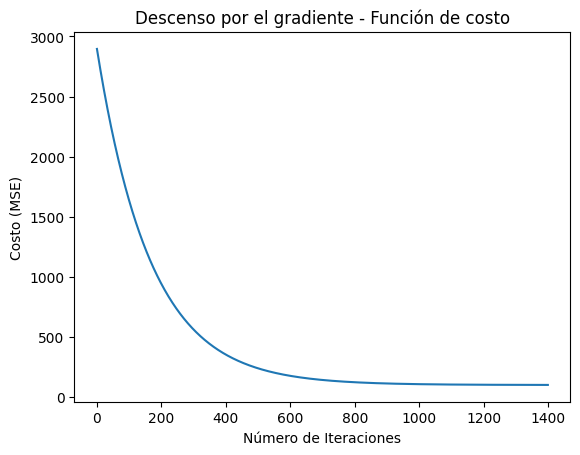

Parámetros aprendidos: [ 7.38663343e+01  1.86353690e-01 -1.07679433e-01 -5.61495438e-01
 -2.92217753e-02  2.92600559e-01  4.49562698e-02 -1.39198034e-01
  2.68256899e-01 -4.33229335e-02 -1.24760277e-01  6.65332087e-02
  2.95868168e-03  4.13458566e-03  2.12866699e-01 -3.49229762e-01
  7.20725843e-02 -2.82322193e-01  7.20725843e-02]


In [11]:
# Visualizar el costo durante las iteraciones
import matplotlib.pyplot as plt

plt.plot(range(iterations), cost_history)
plt.xlabel('Número de Iteraciones')
plt.ylabel('Costo (MSE)')
plt.title('Descenso por el gradiente - Función de costo')
plt.show()

# Imprimir los parámetros finales
print(f"Parámetros aprendidos: {theta}")

In [12]:
#Almacenar una fila del dataset en una variable de prueba
fila = dataset.iloc[2]
fila2= dataset.iloc[3]
fila3= dataset.iloc[4]
fila4= dataset.iloc[5]
fila5= dataset.iloc[6]
fila6= dataset.iloc[7]
fila7= dataset.iloc[8]
fila8= dataset.iloc[9]
fila9= dataset.iloc[10]
fila10= dataset.iloc[11]


In [13]:
fila.drop(['Total_Score', 'Grade'])
fila2.drop(['Total_Score', 'Grade'])
fila3.drop(['Total_Score', 'Grade'])
fila4.drop(['Total_Score', 'Grade'])
fila5.drop(['Total_Score', 'Grade'])
fila6.drop(['Total_Score', 'Grade'])
fila7.drop(['Total_Score', 'Grade'])
fila8.drop(['Total_Score', 'Grade'])
fila9.drop(['Total_Score', 'Grade'])
fila10.drop(['Total_Score', 'Grade'])

Gender                            0
Age                            18.0
Department                      2.0
Attendance (%)                 52.3
Midterm_Score                  49.8
Final_Score                   64.18
Assignments_Avg               57.63
Quizzes_Avg                   65.79
Participation_Score            4.13
Projects_Score                 81.9
Study_Hours_per_Week           23.5
Extracurricular_Activities        0
Internet_Access_at_Home           1
Parent_Education_Level          1.0
Family_Income_Level               2
Stress_Level (1-10)               3
Sleep_Hours_per_Night           5.6
Stress_Level                    3.0
Name: 25, dtype: object

In [14]:
#Ahora vamos a predecir el puntaje total de un estudiante con las características de la fila anterior
# Convertir a un array de numpy
x_pred = np.array(fila.drop(['Total_Score', 'Grade']))
z_pred = np.array(fila2.drop(['Total_Score', 'Grade']))
w_pred = np.array(fila3.drop(['Total_Score', 'Grade']))
q_pred = np.array(fila4.drop(['Total_Score', 'Grade']))
r_pred = np.array(fila5.drop(['Total_Score', 'Grade']))
t_pred = np.array(fila6.drop(['Total_Score', 'Grade']))
y_pred = np.array(fila7.drop(['Total_Score', 'Grade']))
u_pred = np.array(fila8.drop(['Total_Score', 'Grade']))
i_pred = np.array(fila9.drop(['Total_Score', 'Grade']))
o_pred = np.array(fila10.drop(['Total_Score', 'Grade']))



In [15]:
#Ahora normalizar x_pred
x_pred = (x_pred - x_pred.mean()) / x_pred.std()
z_pred = (z_pred - z_pred.mean()) / z_pred.std()
w_pred = (w_pred - w_pred.mean()) / w_pred.std()
q_pred = (q_pred - q_pred.mean()) / q_pred.std()
r_pred = (r_pred - r_pred.mean()) / r_pred.std()
t_pred = (t_pred - t_pred.mean()) / t_pred.std()
y_pred = (y_pred - y_pred.mean()) / y_pred.std()
u_pred = (u_pred - u_pred.mean()) / u_pred.std()
i_pred = (i_pred - i_pred.mean()) / i_pred.std()
o_pred = (o_pred - o_pred.mean()) / o_pred.std()


In [16]:
#Añadir una columna de 1 a x_pred para el término de intersección (bias)
x_pred = np.insert(x_pred, 0, 1)
z_pred = np.insert(z_pred, 0, 1)
w_pred = np.insert(w_pred, 0, 1)
q_pred = np.insert(q_pred, 0, 1)
r_pred = np.insert(r_pred, 0, 1)
t_pred = np.insert(t_pred, 0, 1)
y_pred = np.insert(y_pred, 0, 1)
u_pred = np.insert(u_pred, 0, 1)
i_pred = np.insert(i_pred, 0, 1)
o_pred = np.insert(o_pred, 0, 1)
print(z_pred.shape)
print(x_pred.shape)
print(w_pred.shape)
print(theta.shape)
print(q_pred.shape)
print(r_pred.shape)
print(t_pred.shape)
print(y_pred.shape)
print(u_pred.shape)
print(i_pred.shape)
print(o_pred.shape)


(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)
(19,)


In [17]:
#Realizar la predicción
price=np.dot(x_pred, theta)
price2=np.dot(z_pred, theta)
price3=np.dot(w_pred, theta)
price4=np.dot(q_pred, theta)
price5=np.dot(r_pred, theta)
price6=np.dot(t_pred, theta)
price7=np.dot(y_pred, theta)
price8=np.dot(u_pred, theta)
price9=np.dot(i_pred, theta)
price10=np.dot(o_pred, theta)
print(f"El puntaje 1 total predicho es: {price}")
print(f"El puntaje 2 total predicho es: {price2}")
print(f"El puntaje 3 total predicho es: {price3}")
print(f"El puntaje 4 total predicho es: {price4}")
print(f"El puntaje 5 total predicho es: {price5}")
print(f"El puntaje 6 total predicho es: {price6}")
print(f"El puntaje 7 total predicho es: {price7}")
print(f"El puntaje 8 total predicho es: {price8}")
print(f"El puntaje 9 total predicho es: {price9}")
print(f"El puntaje 10 total predicho es: {price10}")


El puntaje 1 total predicho es: 74.57562961381196
El puntaje 2 total predicho es: 74.7430137786796
El puntaje 3 total predicho es: 74.7885197304265
El puntaje 4 total predicho es: 74.82187033260166
El puntaje 5 total predicho es: 75.01597744494364
El puntaje 6 total predicho es: 74.79824199331598
El puntaje 7 total predicho es: 74.76894897541625
El puntaje 8 total predicho es: 74.55710724169298
El puntaje 9 total predicho es: 74.66135543708211
El puntaje 10 total predicho es: 74.65276947057198


In [18]:
x1=price-66.13
x2=95.62-price2
x3=price3-58.25
x4=87.58-price4
x5=price5-59.05
x6=price6-55.25
x7=price7-66.94
x8=88.63-price8
x9=price9-60.24
x10=90.24-price10
#Imprimir el mayor error y el menor error
print(x1)
print(x2)
print(x3)
print(x4)
print(x5)
print(x6)
print(x7)
print(x8)
print(x9)
print(x10)
print(f"El mayor error es: {max(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10)}")
print(f"El menor error es: {min(x1,x2,x3,x4,x5,x6,x7,x8,x9,x10)}")


8.44562961381196
20.876986221320408
16.5385197304265
12.758129667398336
15.965977444943647
19.548241993315983
7.828948975416253
14.07289275830702
14.421355437082106
15.587230529428012
El mayor error es: 20.876986221320408
El menor error es: 7.828948975416253
